<a href="https://colab.research.google.com/github/xDarkRaven/SC1015-Miniproject/blob/main/VideoGamesProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Members:
* Darrus (U2223371E)   (DMOK006@e.ntu.edu.sg)
* Charmain (U2223590D) (C220186@e.ntu.edu.sg)
* Shivani (U2222698C) (RAJUSHIV001@e.ntu.edu.sg)

# Checkpoint 1: Introduction

***Our objective:*** 
The objective of this project is to analyse the dataset of video game sales and gain insights into the factors that determine the success of video games. 

***Significance of  the topic:***
With the future of gaming looking bright, due to the emergence of new technologies and the increased prevalence of mobile gaming, we believe that this dataset is very relevant and useful for the SCSE community in NTU. This is because we as SCSE students might wish to pursue a career in the gaming industry after graduation. Hence by analysing this dataset, we aim to help current and potential game developers/publishers to make informed decisions about the types of games they should create, as well as the platforms and regions where they should focus their marketing efforts, in order to maximise success of their games.


# Checkpoint 2.1: Data Preparation & Cleaning

## Basic Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Loading in dataset


For the datasets we will be using video game sales dataset 
(https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings)

On top of this we will be suplementing it with the Video Games Companies dataset :
(https://www.kaggle.com/datasets/kkhandekar/large-video-game-companies)

In [ ]:
# Import dataset
data = pd.read_csv('Video_Games_Sales.csv')
vgCompany= pd.read_csv('GamingCompanies.csv')


## Cleaning of the dataset
Data cleansing is an essential step in preparing a dataset for analysis. In this project, a variety of common data cleaning techniques to ensure that the dataset is consistent and error-free.

### Cleaning of VideoGames with Ratings dataset

We will be filling the nan values of Critic_Count and User_Count with 0 as nan values means that it probably has 0 critic/user count or there are some error so for accuracy sake we will filling it with 0




In [ ]:
data.isnull().sum().sort_values(ascending=False).head(20)

User_Count         9129
Critic_Score       8582
Critic_Count       8582
Rating             6769
User_Score         6704
Developer          6623
Year_of_Release     269
Publisher            54
Name                  2
Genre                 2
Platform              0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
dtype: int64

In [ ]:
#Removing duplicate games
data.drop_duplicates(subset=['Name', 'Platform'], inplace=True)

In [ ]:
#User_score contains nan, tbd values and these needs to be replaced or removed.
data['User_Score'].unique()


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Firstly, we noted that “User_Score” attribute had “tbd” and we replace that with "NaN" values instead. 

Next, "User_Score", "Critic_Score", "User_Count", "Critic_Count" has more than half of the rows having "NaN" values so to avoid having lower accuracy and not to skew the data, we will be replacing all "NaN" values with the median of the individual column.  This allows us to retain the original data rather than remove it without altering the overall data. 



Next, we will be filling the "NaN" values of Rating, Publisher and Developer  with "Unknown" value. This is to ensure that the accuracy will not be affected later in Machine Learning stage.

Lastly, We will also be dropping all "NaN" rows of the following columns


1.   Name
2.   Year_of_Release
3.   Genre







In [ ]:
#replace tbd with NaN
data['User_Score'] =data['User_Score'].replace('tbd', np.nan)

#convert "User_Score" column to numeric type
data.User_Score = data.User_Score.astype(float)

#replace NaN values with median
userScore_median_val = data['User_Score'].median()
data['User_Score'].fillna(userScore_median_val, inplace= True)

#replace NaN values with median
criticScore_median_val = data['Critic_Score'].median()
data['Critic_Score'].fillna(criticScore_median_val,inplace=True)


#replace NaN values with median
userCount_median_val=data['User_Count'].median()
data['User_Count'].fillna(userCount_median_val,inplace=True)

#replace NaN values with median
criticCount_median_val=data['Critic_Count'].median()
data['Critic_Count'].fillna(criticCount_median_val,inplace=True)

#replace NaN values with "unknown"
data['Rating'].fillna('Unknown', inplace=True)

data['Publisher'].fillna('Unknown', inplace=True)

data['Developer'].fillna('Unknown', inplace=True)



data=data.dropna(subset=['Name','Year_of_Release','Genre'])


To establish consistency within the "Rating" attribute, the "K-A" value is changed with “E”, and the “RP” value is replaced with “E10+”, ensuring that the rating values are constant across the dataset. 


In [ ]:
# Replace old videogame rating convention "K-A" with "E"

data['Rating']=data['Rating'].replace(['K-A'], 'E')

data['Rating']=data['Rating'].replace(['RP'], 'E10+')

Missing values in the “Year of Release” attribute are dropped, and its datatype is converted from float to integer. This ensures that the property is constant across the dataset and enables for further analysis that requires an integer datatype.


In [ ]:
#Convert 'Year_of_Release' from float to integer
data['Year_of_Release']=data['Year_of_Release'].astype(int)

We have successfully cleaned the Video Games Sales dataset, now we will move on to cleaning of the Large Video Game Companies Dataset

In [ ]:
data.isnull().sum().sort_values(ascending=False).head(20)

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

### Cleaning of Large Video Game Companies dataset

All 0 values within the “Large Video Game Companies” dataset are replaced with “NaN” and dropped to ensure  that the dataset provided accurate and valuable insights without being skewed by inaccuracies or biases in the analysis caused by incomplete/missing data.

The country column will be dropped as it is not useful for machine learning.

In [ ]:
vgCompany['employeeCount'].replace(0, np.nan, inplace=True)
vgCompany['earnings'].replace(0, np.nan, inplace=True)
vgCompany['OperatingMargin'].replace(0, np.nan, inplace=True)
vgCompany['PERatio'].replace(0, np.nan, inplace=True)
vgCompany['Revenue'].replace(0, np.nan, inplace=True)

#Dropped as this is not needed in machine learning
vgCompany.drop(['country'],inplace=True,axis=1)

In [ ]:
vgCompany.isnull().sum().sort_values(ascending=False).head(20)


employeeCount      17
earnings            5
OperatingMargin     5
PERatio             5
Revenue             5
Name                0
marketcap           0
dtype: int64

In [ ]:
vgCompany=vgCompany.dropna(subset=['employeeCount','earnings','OperatingMargin','PERatio','Revenue'])

In [ ]:
vgCompany.isnull().sum().sort_values(ascending=False).head(20)


Name               0
marketcap          0
earnings           0
employeeCount      0
OperatingMargin    0
PERatio            0
Revenue            0
dtype: int64

To be able to merge the Video Game Companies Dataset with the Video Games Sales dataset, we will be renaming the column "Name" on Video Game Companies dataset with "Publisher"

In [ ]:
#Renaming the column "Name" to "Publisher" so its easier to merge the datasets
vgCompany=vgCompany.rename(columns = {'Name' : 'Publisher'})


In [ ]:
import plotly.express as px

fig = px.bar(vgCompany, y='employeeCount', x='Publisher', text_auto='.2s',
            title="Number of Employees in each Video Game Company")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

Filling the null rows of Revenue,PERatio,OperatingMargin, Employeecount, earnings and marketcap

We will be filling the null rows of Revenue,PERatio, OperatingMargin, Employeecount, earnings and marketcap with the mean of the column to ensure that the accuracy would not be affected

In [ ]:
fig = px.bar(vgCompany, y='marketcap', x='Publisher', text_auto='.2s',
            title="Market Cap of each Video Game Company")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

Microsoft has both the highest number of employees and the highest marketcap as compared to the other companies.
Microsoft Corporation is an American multinational technology corporation headquartered in Redmond, Washington. Microsoft is better known for their softwares products instead of games so hence why Microsoft do not have the highest number of sales


## Remove Outliers 
Outliers can have a significant influence on data analysis outcomes, thus they must always be identified and removed if necessary.

### Locate Outliers
#### Total Global Sales from 1980 to 2016

In [ ]:

df_sales= data.groupby(['Year_of_Release'])['Global_Sales'].sum().reset_index()


fig = px.bar(df_sales, y='Global_Sales', x='Year_of_Release', text_auto='.2s',
            title="Total Global Sales from 1980 to 2016")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()


### Remove outliers
It was found that games that was that were launched prior to 1996 can be considered as outliers, so including them in the analysis might have skewed the data. Thus, to ensure that the analysis appropriately reflected the data's trends and patterns, these data points were dropped from the dataset.


In [ ]:
drop_year = [1980.0, 1981.0, 1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0, 1990.0, 1991.0,1992.0,1993.0, 1994.0, 1995.0 ,2017.0,2020.0]

data =data[~data.Year_of_Release.isin(drop_year)]
data.groupby(['Year_of_Release']).size()

Year_of_Release
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     938
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     651
2013     544
2014     581
2015     606
2016     502
dtype: int64

In [ ]:
data.isnull().sum().sort_values(ascending=False).head(20)


Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

## Merging video game companies with the video game sales dataset

As mentioned earlier we have renamed the column "Name" on Video game company dataset with "Publisher" to allow easier merging of the two datasets

In [ ]:
gamesAndCompanies_df = data.merge(vgCompany, how='left', on='Publisher')


After merging the datasets together , we have noticed that the rows of the merged datasets contained a lot of "NaN" rows and this is due to the smaller size of companies on the Video Game Company dataset as compared to the companies on the Video Games Sales dataset, we will look at this issue in the next part and how we solve it

In [ ]:
gamesAndCompanies_df.isnull().sum().sort_values(ascending=False).head(20)


Revenue            13143
PERatio            13143
OperatingMargin    13143
employeeCount      13143
earnings           13143
marketcap          13143
Platform               0
Rating                 0
Developer              0
User_Count             0
User_Score             0
Name                   0
Critic_Score           0
Global_Sales           0
Other_Sales            0
JP_Sales               0
EU_Sales               0
NA_Sales               0
Publisher              0
Genre                  0
dtype: int64

In [ ]:
gamesAndCompanies_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,User_Score,User_Count,Developer,Rating,marketcap,earnings,employeeCount,OperatingMargin,PERatio,Revenue
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,...,8.0,322.0,Nintendo,E,4.836594e+10,6.022310e+09,6574.0,4048.52,12.0785,1.487531e+10
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,...,8.3,709.0,Nintendo,E,4.836594e+10,6.022310e+09,6574.0,4048.52,12.0785,1.487531e+10
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,...,8.0,192.0,Nintendo,E,4.836594e+10,6.022310e+09,6574.0,4048.52,12.0785,1.487531e+10
3,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,...,7.5,24.0,Unknown,Unknown,4.836594e+10,6.022310e+09,6574.0,4048.52,12.0785,1.487531e+10
4,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,...,8.5,431.0,Nintendo,E,4.836594e+10,6.022310e+09,6574.0,4048.52,12.0785,1.487531e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15731,Samurai Warriors: Sanada Maru,PS3,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,...,7.5,24.0,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
15732,LMA Manager 2007,X360,2006,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,...,7.5,24.0,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
15733,Haitaka no Psychedelica,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,...,7.5,24.0,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
15734,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,...,7.5,24.0,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

gamesAndCompanies_df['Revenue'].fillna((gamesAndCompanies_df['Revenue'].mean()), inplace=True)
gamesAndCompanies_df['PERatio'].fillna((gamesAndCompanies_df['PERatio'].mean()), inplace=True)
gamesAndCompanies_df['OperatingMargin'].fillna((gamesAndCompanies_df['OperatingMargin'].mean()), inplace=True)
gamesAndCompanies_df['employeeCount'].fillna((gamesAndCompanies_df['employeeCount'].mean()), inplace=True)
gamesAndCompanies_df['earnings'].fillna((gamesAndCompanies_df['earnings'].mean()), inplace=True)
gamesAndCompanies_df['marketcap'].fillna((gamesAndCompanies_df['marketcap'].mean()), inplace=True)


In [ ]:
gamesAndCompanies_df.isnull().sum().sort_values(ascending=False).head(20)


Name               0
Platform           0
PERatio            0
OperatingMargin    0
employeeCount      0
earnings           0
marketcap          0
Rating             0
Developer          0
User_Count         0
User_Score         0
Critic_Count       0
Critic_Score       0
Global_Sales       0
Other_Sales        0
JP_Sales           0
EU_Sales           0
NA_Sales           0
Publisher          0
Genre              0
dtype: int64

In [ ]:
gamesAndCompanies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15736 entries, 0 to 15735
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             15736 non-null  object 
 1   Platform         15736 non-null  object 
 2   Year_of_Release  15736 non-null  int64  
 3   Genre            15736 non-null  object 
 4   Publisher        15736 non-null  object 
 5   NA_Sales         15736 non-null  float64
 6   EU_Sales         15736 non-null  float64
 7   JP_Sales         15736 non-null  float64
 8   Other_Sales      15736 non-null  float64
 9   Global_Sales     15736 non-null  float64
 10  Critic_Score     15736 non-null  float64
 11  Critic_Count     15736 non-null  float64
 12  User_Score       15736 non-null  float64
 13  User_Count       15736 non-null  float64
 14  Developer        15736 non-null  object 
 15  Rating           15736 non-null  object 
 16  marketcap        15736 non-null  float64
 17  earnings    

# Checkpoint 2.2: Data Processing
In this section, we outline the guiding questions we used to process the data and the results we got.

## Q1: Which video game genres are the most successful in terms of sales, and how does this differ by platform and region?

### Which game genre is the most successful in terms of sales?

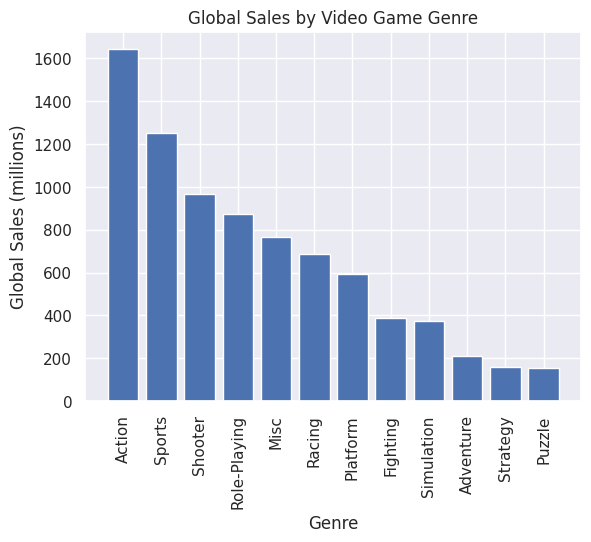

In [ ]:
# Group the data by genre and sum the global sales for each genre
genre_sales = data.groupby('Genre')['Global_Sales'].sum()

# Sort the sales in descending order
genre_sales_rank = genre_sales.sort_values(ascending=False)

# Create a bar chart to visualize the global sales by genre
plt.bar(genre_sales_rank.index, genre_sales_rank.values)

# Set the chart title and axis labels
plt.title('Global Sales by Video Game Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (millions)')

# Display the chart
plt.xticks(rotation=90)
plt.show()

Most Successful Game genre (Global sales) : Action

1. Action
2. Sports
3. Shooter 
4. Role-Playing
5. Platform


### How does this vary by platform?

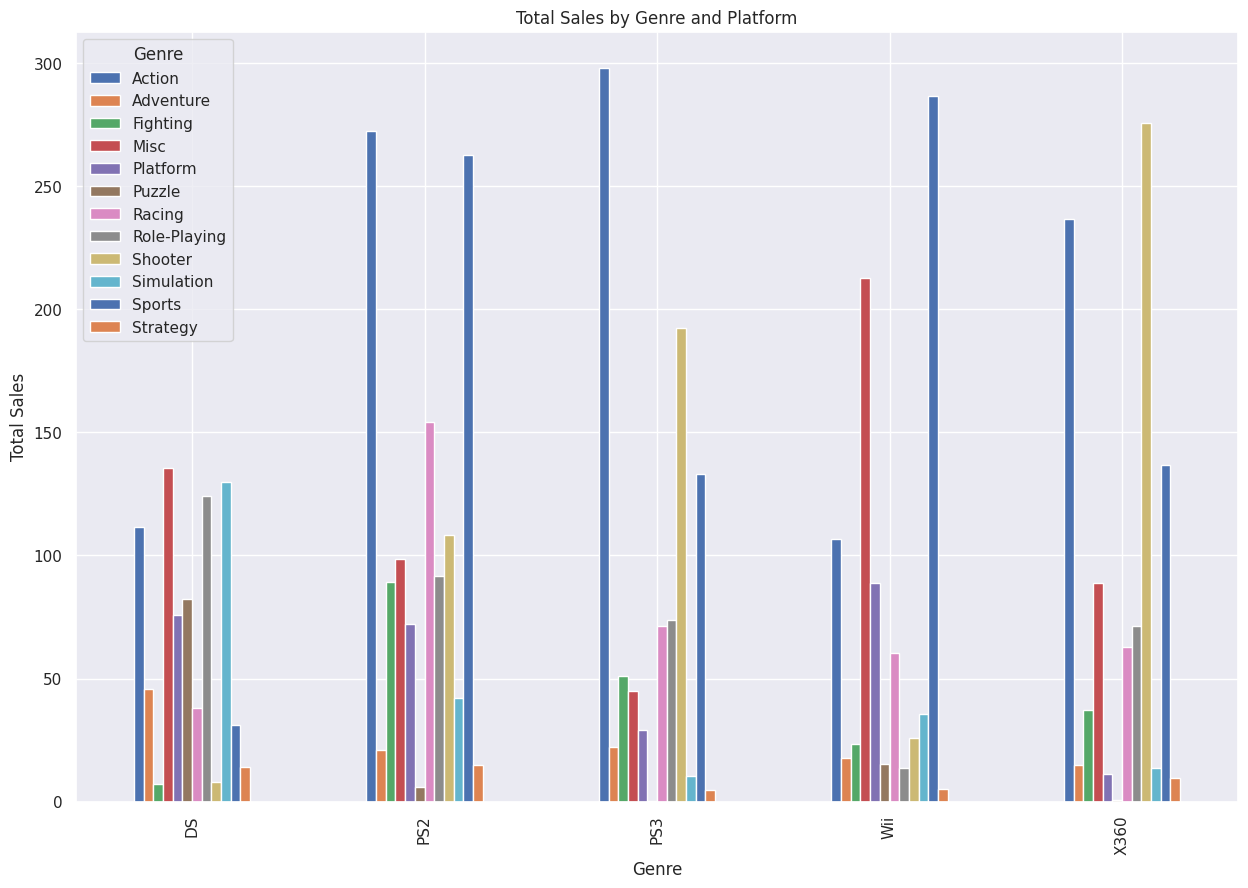

In [ ]:
# Get the top 5 platforms with the most sales
top5_platform = data.groupby('Platform')['Global_Sales'].sum().nlargest(5).index

# Filter the dataset to only include the top 5 platforms
new_top5_platform = data[data['Platform'].isin(top5_platform)]

#Pivot table - shows the total sales of each genre for each region.
#Create a pivot table for globalsales for each genre + platform
genre_platform_pivot = pd.pivot_table(new_top5_platform, values='Global_Sales', index='Genre', columns='Platform', aggfunc='sum')

# Transpose the table to switch the rows and columns 
# -> for each region, the different genres sales
transposed = genre_platform_pivot.transpose()

# Create a grouped bar chart of the total sales by genre and platform
fig, ax = plt.subplots(figsize=(15,10))
transposed.plot(kind='bar', ax=ax)
ax.set_title('Total Sales by Genre and Platform')
ax.set_xlabel('Genre')
ax.set_ylabel('Total Sales')
plt.show()

In [ ]:
# Group by platform and sum global sales
platform_sales = data.groupby('Platform')['Global_Sales'].sum()

# Sort by global sales in descending order
platform_sales = platform_sales.sort_values(ascending=False)
platform_sales.head(10)

Platform
PS2     1233.46
X360     960.14
PS3      931.14
Wii      891.74
DS       803.42
PS       685.47
PS4      314.19
GBA      313.56
PSP      289.79
3DS      257.92
Name: Global_Sales, dtype: float64

In [ ]:
transposed

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
DS,111.39,45.76,7.11,135.63,75.89,82.34,38.05,124.16,7.92,129.62,31.29,14.26
PS2,272.43,21.16,89.19,98.69,72.11,5.90,154.21,91.55,108.28,42.26,262.64,15.04
PS3,297.83,22.25,51.08,44.95,29.23,0.44,71.31,73.61,192.22,10.32,133.24,4.66
Wii,106.71,17.74,23.33,212.82,88.86,15.33,60.22,13.70,25.77,35.69,286.54,5.03
X360,236.73,14.94,37.34,88.92,11.32,0.71,62.90,71.31,275.67,13.84,136.78,9.68


Most Successful game genre when varying by platform :

1. PS2 -> Action  
2. X360 -> Shooter   
3. PS3 -> Action
4. Wii -> Sports
5. DS -> Misc
6. PS -> Action
7. GBA -> Platform
8. PS4 -> Action
9. PSP -> Action 
10. PC -> Simulation

### How does this vary by Region?

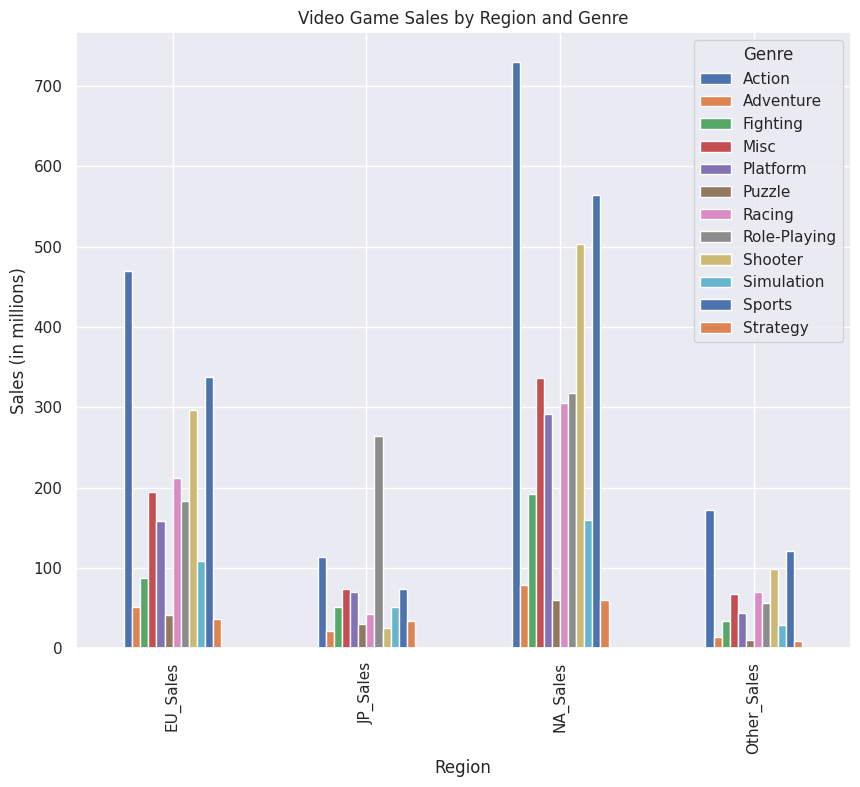

In [ ]:
# Group by: genre, region and globalsales(sum)
genre_region_sales = data.groupby(['Genre','NA_Sales', 'EU_Sales','JP_Sales','Other_Sales'])['Global_Sales'].sum().reset_index()

#Pivot table - shows the total sales of each genre for each region.

#Create a pivot table for globalsales for each genre + region
genre_region_pivot = pd.pivot_table(genre_region_sales, values=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], index=['Genre'], aggfunc='sum')

# Transpose the table to switch the rows and columns 
#-> xaxis = region, for each region, the different genres sales
transposed = genre_region_pivot.transpose()

# Create grouped bar plot
fig, ax = plt.subplots(figsize=(10,8))
transposed.plot(kind='bar', ax=ax)

# Set title and label
ax.set_title('Video Game Sales by Region and Genre')
ax.set_xlabel('Region')
ax.set_ylabel('Sales (in millions)')
plt.show()

In [ ]:
transposed

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
EU_Sales,469.54,51.14,88.01,194.45,158.24,41.10,212.34,182.69,297.07,107.99,337.31,36.97
JP_Sales,112.99,21.60,51.11,73.89,69.85,29.73,42.02,264.74,25.64,51.58,74.36,33.66
NA_Sales,730.18,78.67,191.67,335.82,291.15,59.78,305.74,317.78,502.88,159.31,563.62,59.63
Other_Sales,171.84,14.41,33.68,67.72,43.70,9.96,70.01,56.13,99.14,28.65,121.21,9.49


Most Successful game genre when varying by region :
1. EU_Sales -> Action
2. JP_Sales -> Role-Playing
3. NA_Sales -> Action
4. Others_Sales -> Action

### Insights for Q1

According to the 3 figures above, Action is the most successful video game genre in terms of global sales, followed by Sports and Shooter. The success of these genres varies depending on platform and region, with Action and Sports games being successful globally while Role-Playing games being successful primarily in Japan.


## Q2: What influence do user reviews and critic reviews have on the sales success of a video game?


In [ ]:
vg_sales = pd.DataFrame(data[['Name','Genre','User_Score','Critic_Score','Global_Sales','Critic_Count','User_Count']])
vg_sales

,Name,Genre,User_Score,Critic_Score,Global_Sales,Critic_Count,User_Count
0,Wii Sports,Sports,8.0,76.0,82.53,51.0,322.0
2,Mario Kart Wii,Racing,8.3,82.0,35.52,73.0,709.0
3,Wii Sports Resort,Sports,8.0,80.0,32.77,73.0,192.0
4,Pokemon Red/Pokemon Blue,Role-Playing,7.5,71.0,31.37,21.0,24.0
6,New Super Mario Bros.,Platform,8.5,89.0,29.80,65.0,431.0
...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,Action,7.5,71.0,0.01,21.0,24.0
16715,LMA Manager 2007,Sports,7.5,71.0,0.01,21.0,24.0
16716,Haitaka no Psychedelica,Adventure,7.5,71.0,0.01,21.0,24.0
16717,Spirits & Spells,Platform,7.5,71.0,0.01,21.0,24.0


To answer this qn we first found the mean critic score and mean user score by genre. 

In [ ]:
# mean user_score of each genre.
genre_score_us = vg_sales.groupby(['Genre'])['User_Score'].mean().reset_index()
genre_score_us 

,Genre,User_Score
0,Action,7.253080
1,Adventure,7.415233
2,Fighting,7.395937
3,Misc,7.322633
4,Platform,7.396478
5,Puzzle,7.413244
6,Racing,7.255425
7,Role-Playing,7.565035
8,Shooter,7.167488
9,Simulation,7.357850


In [ ]:
df = px.data.tips()
genre_score_us_rank = genre_score_us.sort_values(by="User_Score",ascending=True)
fig = px.bar(genre_score_us_rank, y="User_Score", x= "Genre", orientation='v', text_auto='.2s',title= "Mean User Score by Genre(out of 10)")
fig.update_traces(textfont_size=10, textangle=0, textposition="outside", cliponaxis=False)
fig.update_yaxes(range=[0, 10]) 
fig.show()

The top genres with highest mean user score is:

1. Role playing (with user score of 7.6)

With the remaining tied at user score of 7.4:

2. Adventure
3. Puzzle
4. Strategy
5. Simulation
6. Platform
7. Fighting


In [ ]:
# mean critic_score of each genre.
genre_score_cs=vg_sales.groupby(['Genre'])['Critic_Score'].mean().reset_index()
genre_score_cs

,Genre,Critic_Score
0,Action,68.510268
1,Adventure,69.552486
2,Fighting,70.023591
3,Misc,69.680762
4,Platform,69.227673
5,Puzzle,69.408829
6,Racing,69.155593
7,Role-Playing,71.858156
8,Shooter,70.427750
9,Simulation,70.018116


In [ ]:
df = px.data.tips()
genre_score_cs_rank = genre_score_cs.sort_values(by="Critic_Score",ascending=True)
fig = px.bar(genre_score_cs_rank, y="Critic_Score", x= "Genre", orientation='v', text_auto='.2s',title= "Mean Critic Score by Genre(out of 100)")
fig.update_traces(textfont_size=10, textangle=0, textposition="outside", cliponaxis=False)
fig.update_yaxes(range=[0, 100]) 
fig.show()

The top genres with highest mean critic score is:

The first three tied at the critic score of 72:

1. Role playing
2. Strategy
3. Sports

The remaining 5 tied at the critic score of 70:

4. Shooter
5. Fighting
6. Simulation
7. Fighter
8. Miscellaneous


Then to get a general view to see how the user score and critic score affects global sales for each genre, we plotted scatterplot for each variable.

In [ ]:
df = px.data.tips()
fig = px.scatter(vg_sales, x="User_Score", y="Global_Sales", color="Genre",
                 title="Sales Effect by User Score for Each Genre")
fig.show()

In [ ]:
df = px.data.tips()
fig = px.scatter(vg_sales, x="Critic_Score", y="Global_Sales", color="Genre",
                 title="Sales Effect by Critic Score for Each Genre")
fig.show()

In [ ]:
vg_sales.corr()

,User_Score,Critic_Score,Global_Sales,Critic_Count,User_Count
User_Score,1.000000,0.477462,0.049677,0.122535,-0.002140
Critic_Score,0.477462,1.000000,0.202721,0.396787,0.245677
Global_Sales,0.049677,0.202721,1.000000,0.288120,0.257856
Critic_Count,0.122535,0.396787,0.288120,1.000000,0.390513
User_Count,-0.002140,0.245677,0.257856,0.390513,1.000000


<Axes: >

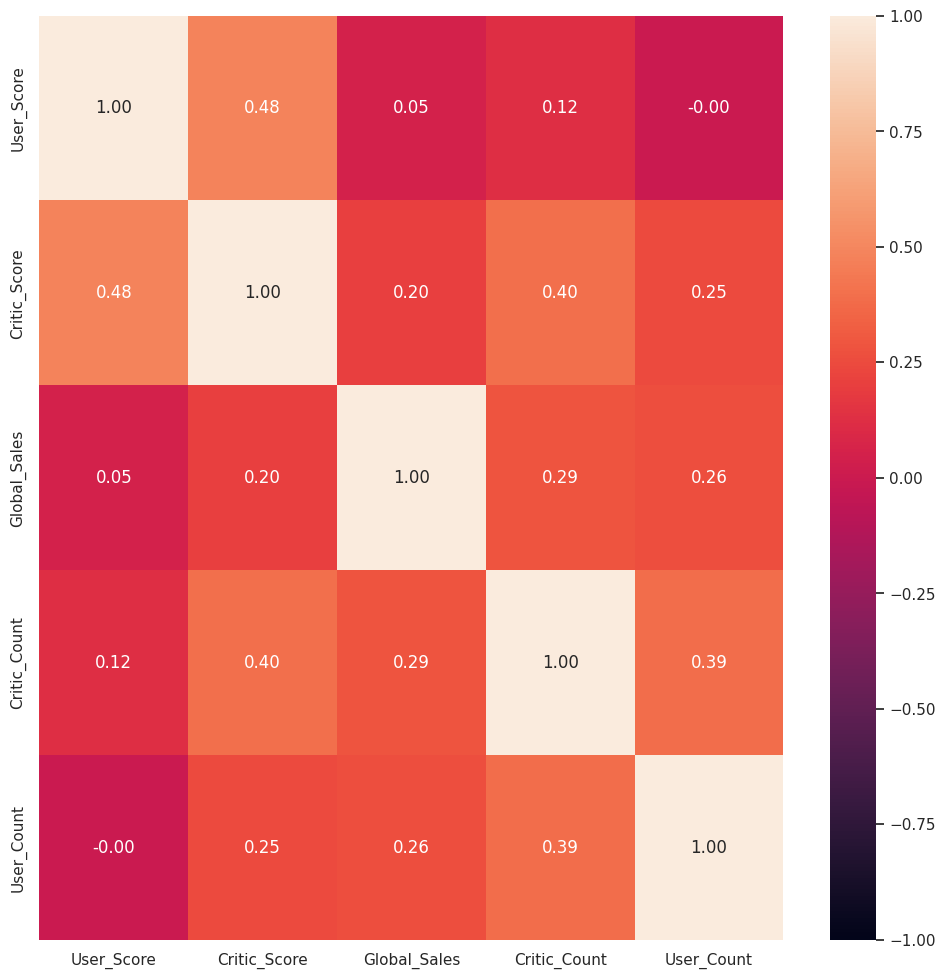

In [ ]:
f = plt.figure(figsize=(12, 12))
sb.heatmap(vg_sales.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

### Insights for Q2
Both the user score and the critic score have an impact on the sales. Comparing the two variables,critic score has a larger impact on the global sales compared to user score(according to the heatmap). 

Comparing to results from guiding qn 1, the 5 most suceessful genre were:
  1. Action
  2. Sports
  3. Shooter 
  4. Role-Playing
  5. Platform

However, the top genres with highest mean user score is:
1. Role playing 
2. Adventure
3. Puzzle
4. Strategy
5. Simulation
6. Platform
7. Fighting


and top genres with highest mean critic score is:
1. Role playing
2. Strategy
3. Sports
4. Shooter
5. Fighting
6. Simulation
7. Fighter
8. Miscellaneous


This shows that there are other variables in play that affect sucess of genre in terms of sales.


## Q3: How do factors like game rating, release year, and publisher influence a video game's sales success?

### How does Global Sales vary by game rating?

In [ ]:
ratingSales =data.groupby(['Rating'])['Global_Sales'].sum().reset_index()

df = px.data.tips()
fig = px.bar(ratingSales, x="Global_Sales", y="Rating", orientation='h', text_auto='.2s',title="Global Sales by Game's Rating (in millions)")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

### How does the year of release affect the global sales?


In [ ]:
fig = px.line(df_sales, x="Year_of_Release", y="Global_Sales", title='Global Sales from 1996 to 2020 (in millions)')
fig.show()

### What are the top game publishers in terms of number of game releases?
Electronic Arts tops the list for the number of game releases

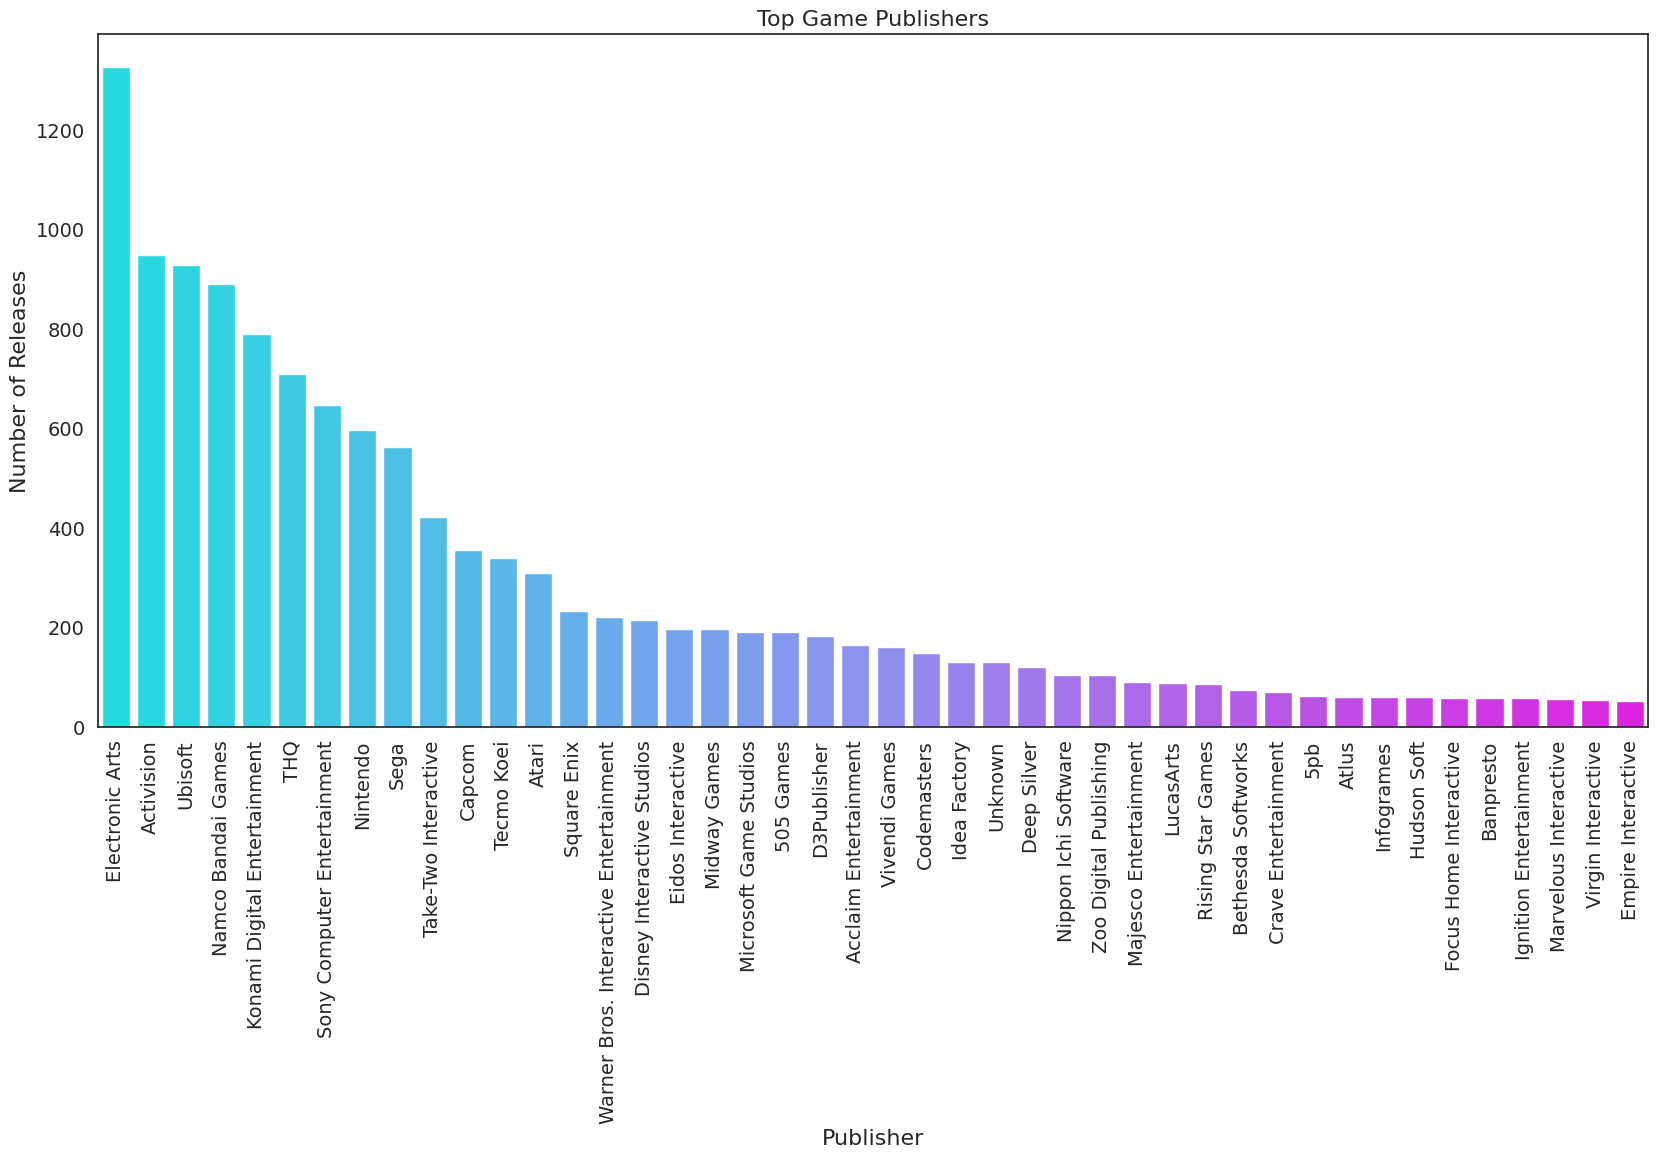

In [ ]:
fig=plt.figure(figsize=(20,9))
sb.set_style("white")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Top Game Publishers',fontdict={'fontsize':16})
plt.xticks(rotation=90)
sb.barplot(x=data['Publisher'].value_counts()[data['Publisher'].value_counts()>50].index,y=data['Publisher'].value_counts()[data['Publisher'].value_counts()>50],palette='cool')
plt.xlabel('Publisher',fontdict={'fontsize':16})
plt.ylabel('Number of Releases',fontdict={'fontsize':16});

### The different publishers and their sales

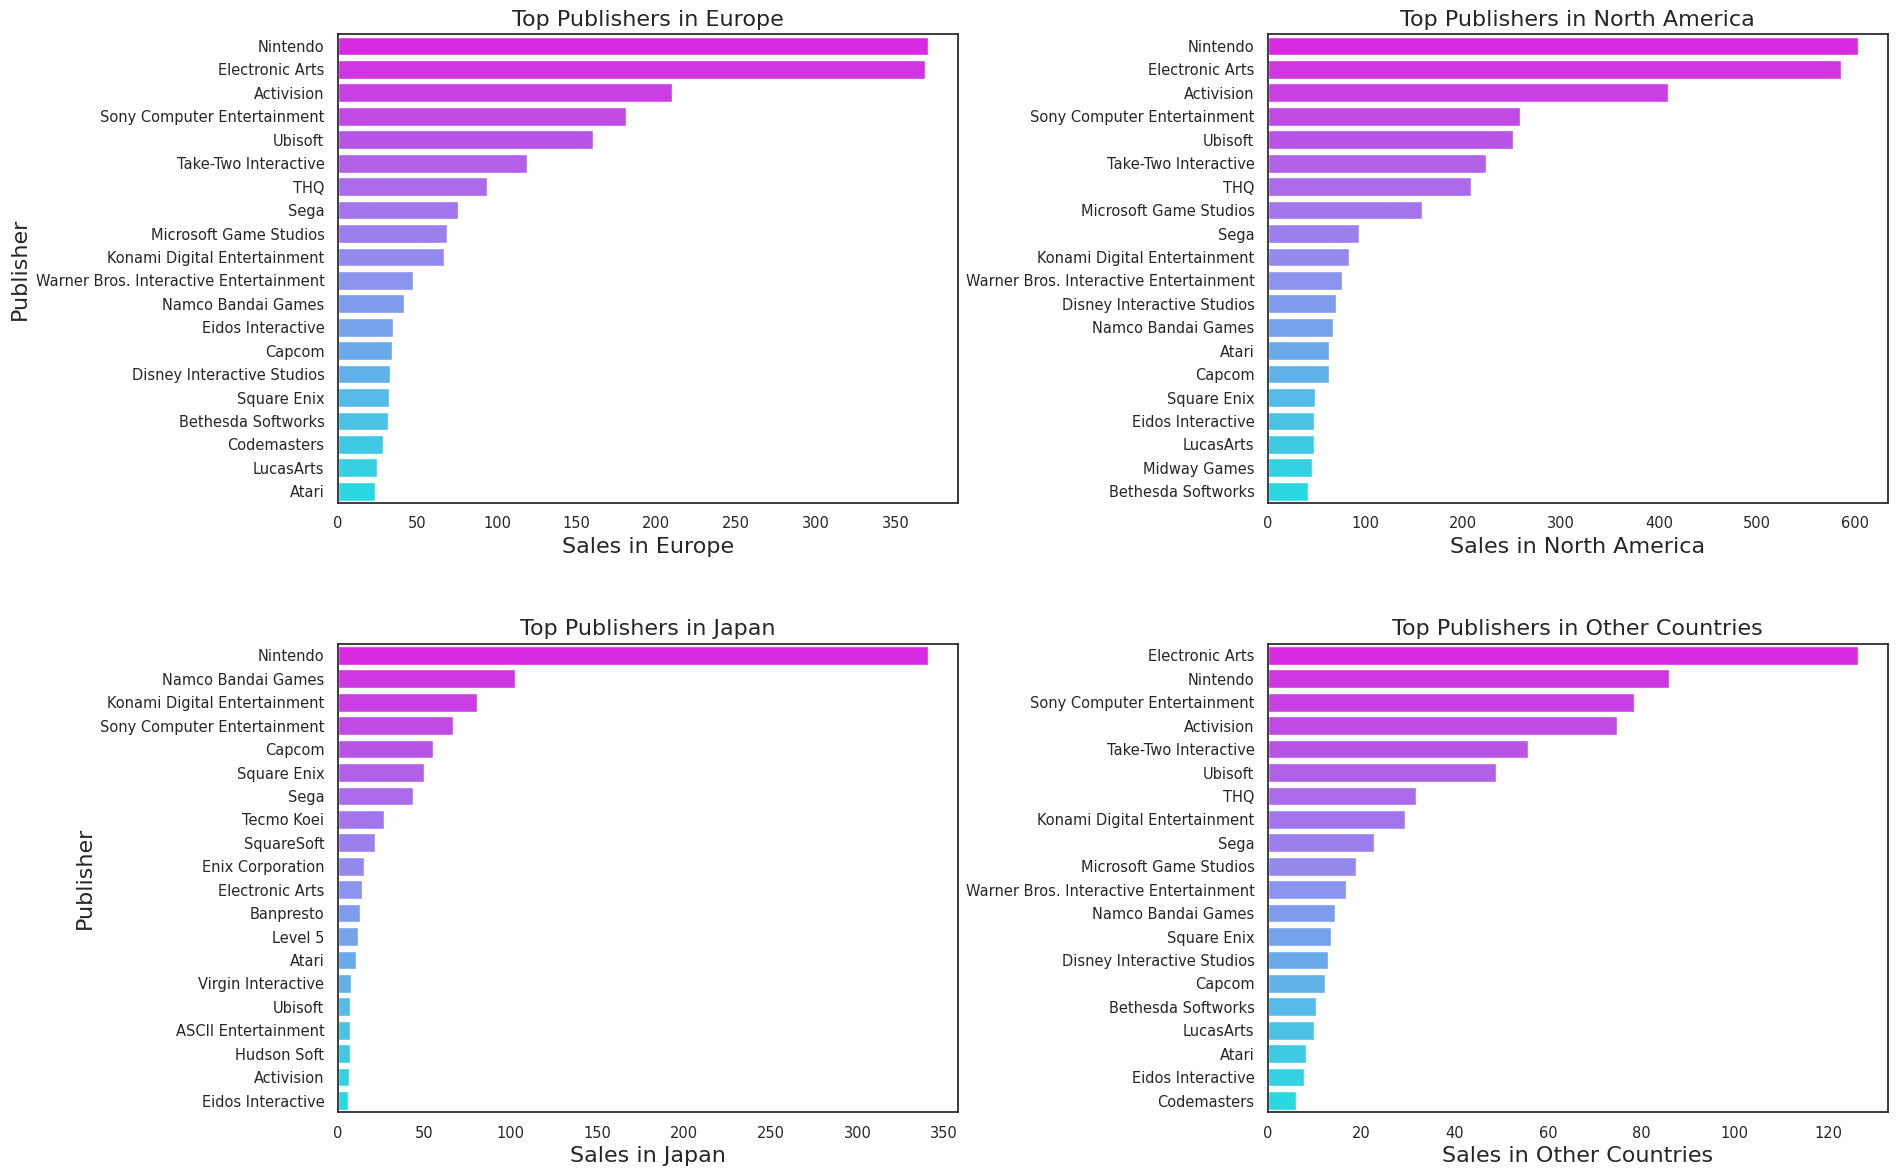

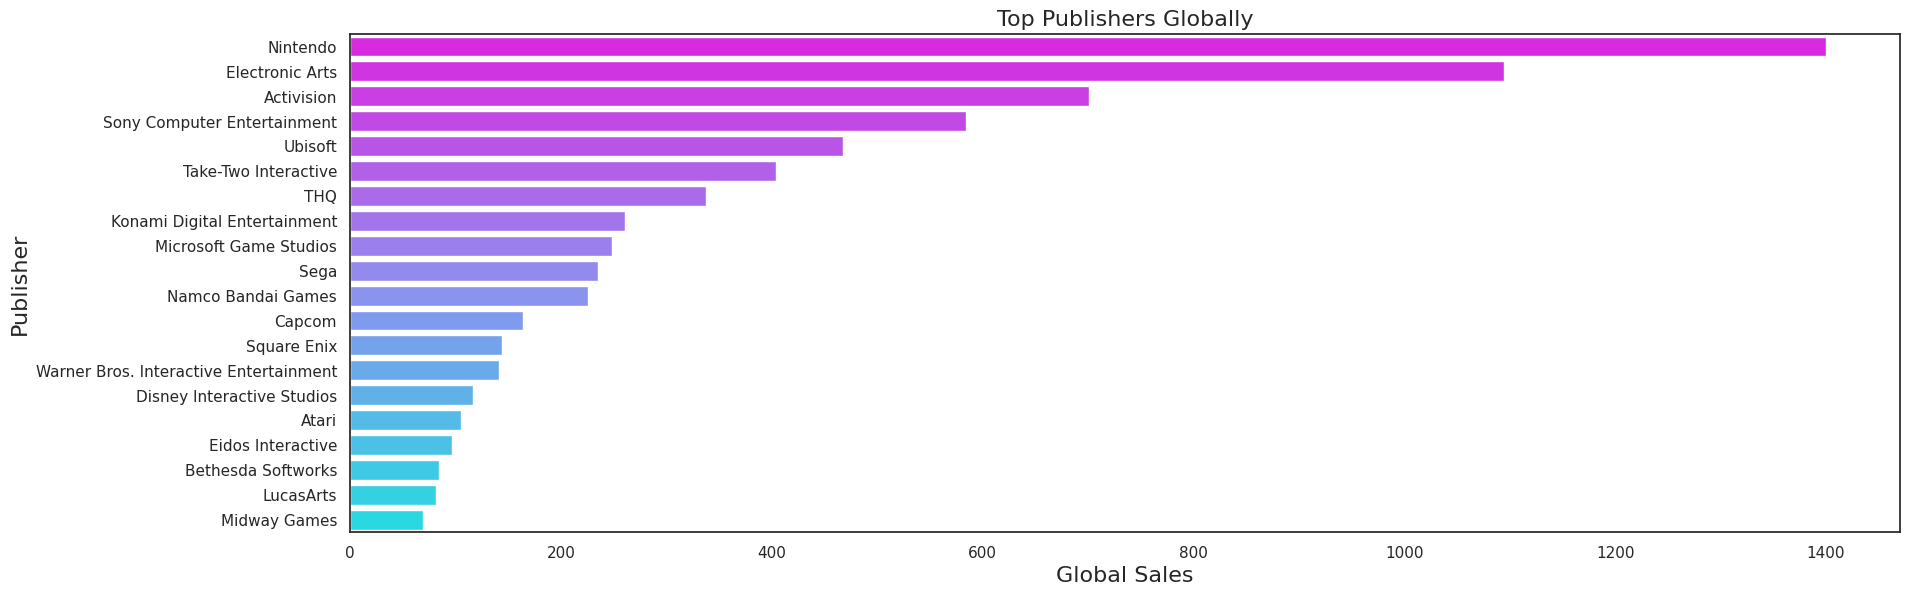

In [ ]:
fig=plt.figure(figsize=(20,14))
plt.subplots_adjust(left=None, wspace=0.50, hspace=0.30)
sb.set_style("white")

plt.subplot(2, 2, 1)
plt.xticks(fontsize=10.5)
plt.yticks(fontsize=10.5)
plt.title('Top Publishers in Europe',fontdict={'fontsize':16})
sb.barplot(y='Publisher', x='EU_Sales', data=data.groupby('Publisher').sum().EU_Sales.sort_values(ascending=False).reset_index().head(20),palette='cool_r');
plt.ylabel('Publisher',fontdict={'fontsize':16})
plt.xlabel('Sales in Europe',fontdict={'fontsize':16});

plt.subplot(2, 2, 2)
plt.xticks(fontsize=10.5)
plt.yticks(fontsize=10.5)
plt.title('Top Publishers in North America',fontdict={'fontsize':16})
sb.barplot(y='Publisher', x='NA_Sales', data=data.groupby('Publisher').sum().NA_Sales.sort_values(ascending=False).reset_index().head(20),palette='cool_r');
plt.ylabel('',fontdict={'fontsize':16})
plt.xlabel('Sales in North America',fontdict={'fontsize':16});

plt.subplot(2, 2, 3)
plt.xticks(fontsize=10.5)
plt.yticks(fontsize=10.5)
plt.title('Top Publishers in Japan',fontdict={'fontsize':16})
sb.barplot(y='Publisher', x='JP_Sales', data=data.groupby('Publisher').sum().JP_Sales.sort_values(ascending=False).reset_index().head(20),palette='cool_r');
plt.ylabel('Publisher',fontdict={'fontsize':16})
plt.xlabel('Sales in Japan',fontdict={'fontsize':16});

plt.subplot(2, 2, 4)
plt.xticks(fontsize=10.5)
plt.yticks(fontsize=10.5)
plt.title('Top Publishers in Other Countries',fontdict={'fontsize':16})
sb.barplot(y='Publisher', x='Other_Sales', data=data.groupby('Publisher').sum().Other_Sales.sort_values(ascending=False).reset_index().head(20),palette='cool_r');
plt.ylabel('',fontdict={'fontsize':16})
plt.xlabel('Sales in Other Countries',fontdict={'fontsize':16});

fig=plt.figure(figsize=(20,22))
plt.subplot2grid((3,1), (1,0))
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title('Top Publishers Globally',fontdict={'fontsize':16})
sb.barplot(y='Publisher', x='Global_Sales', data=data
           .groupby('Publisher').sum().Global_Sales.sort_values(ascending=False).reset_index().head(20),palette='cool_r');
plt.ylabel('Publisher',fontdict={'fontsize':16})
plt.xlabel('Global Sales',fontdict={'fontsize':16});

In [ ]:
#Create dataframe
sales = pd.DataFrame(data[['Name','Platform','Genre','NA_Sales', 'EU_Sales','JP_Sales','Other_Sales','Global_Sales']])
sales

,Name,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,Sports,41.36,28.96,3.77,8.45,82.53
2,Mario Kart Wii,Wii,Racing,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,Sports,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,31.37
6,New Super Mario Bros.,DS,Platform,11.28,9.14,6.50,2.88,29.80
...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,Action,0.00,0.00,0.01,0.00,0.01
16715,LMA Manager 2007,X360,Sports,0.00,0.01,0.00,0.00,0.01
16716,Haitaka no Psychedelica,PSV,Adventure,0.00,0.00,0.01,0.00,0.01
16717,Spirits & Spells,GBA,Platform,0.01,0.00,0.00,0.00,0.01


## Q4: Which attribute has the most influence on video game sales?

### The Correlation of the different variables

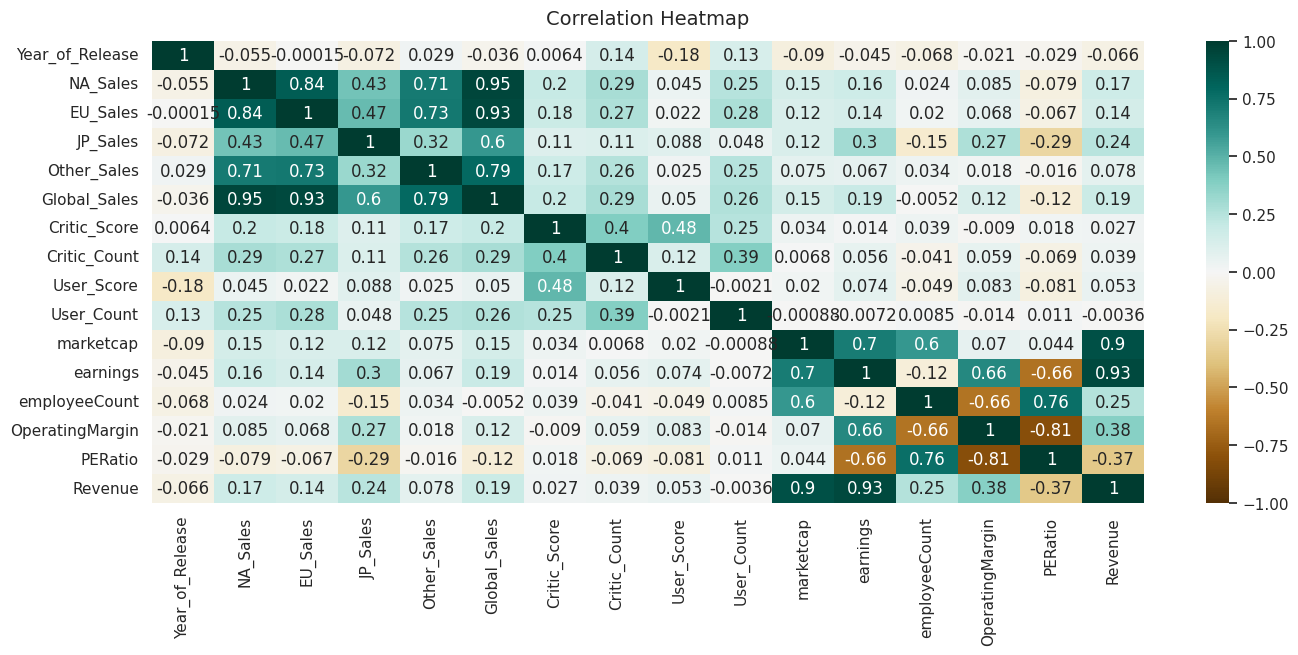

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sb.heatmap(gamesAndCompanies_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

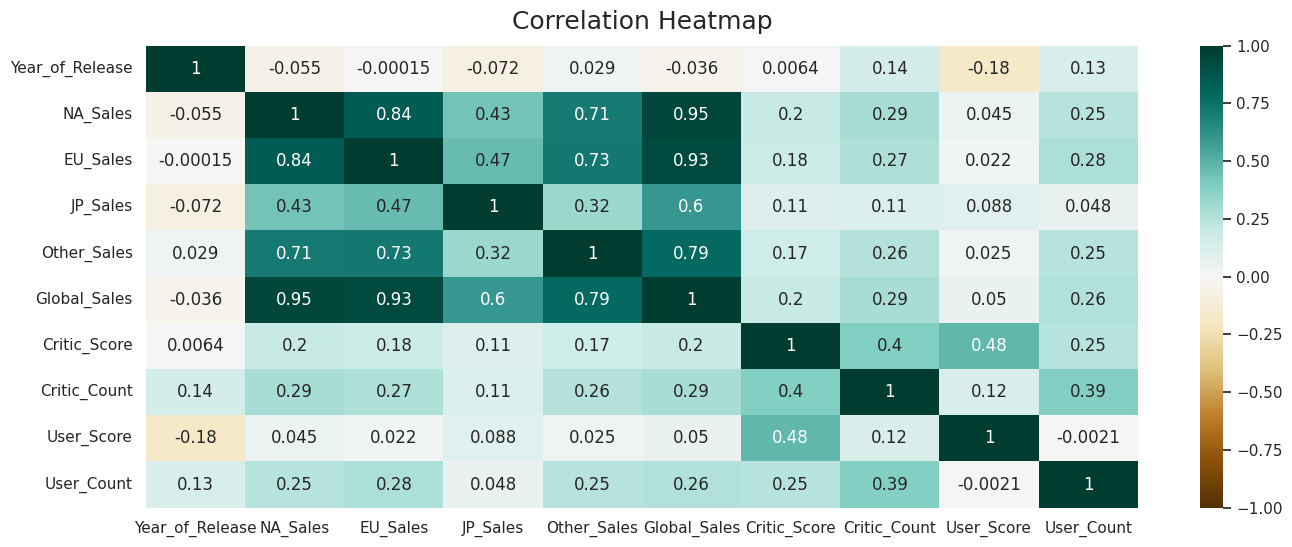

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sb.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

### Insights 
What can we deduce from these heatmaps?

The correlation of the sales variable to the revenue/earnings are one of the highest but it is understood that higher global sales means higher revenue. Hence the next best variable is Marketcap of a video game company, Critic_Score, Critic_Count, User_Count

Therefore, for machine learning we would be using for the predictors: 

1.   marketcap
2.   Critic_Score
3.   Critic_Count
4.   User_Count


The response we will be focusing on :
1.   Global_Sales

The reasons as to why we are not including the other sales columns are that due to some models we can only use one variable for the response 


# Checkpoint 3 and Checkpoint 4


## Machine Learning preparation



### Checking Skewness of the variables
Checking the skewness of the variables we are using for our machine learning model

As you can see out sales figure are skewed horribly, this needs to be considered when using machine learning, or predicting future values. Most machine learning techniques assume normally skewed data, as a result of this before we undertake any machine learning we should deskew the data so it increases the accuracy of the results. I will attempt to use np.log1p as it will most accurately unskew the data

On top of that I will be attempting to unskew User_Count too

In [ ]:
print("The skewness of Global_Sales is {}".format(gamesAndCompanies_df['Global_Sales'].skew()))
print("The skewness of Critic_Score is {}".format(gamesAndCompanies_df['Critic_Score'].skew()))
print("The skewness of Critic_Count is {}".format(gamesAndCompanies_df['Critic_Count'].skew()))
print("The skewness of User_Count is {}".format(gamesAndCompanies_df['User_Count'].skew()))
print("The skewness of marketcap is {}".format(gamesAndCompanies_df['marketcap'].skew()))


The skewness of Global_Sales is 18.519554515276702
The skewness of Critic_Score is -1.1426182546207948
The skewness of Critic_Count is 2.0847134457566083
The skewness of User_Count is 13.128558625619494
The skewness of marketcap is -1.8699914802732076


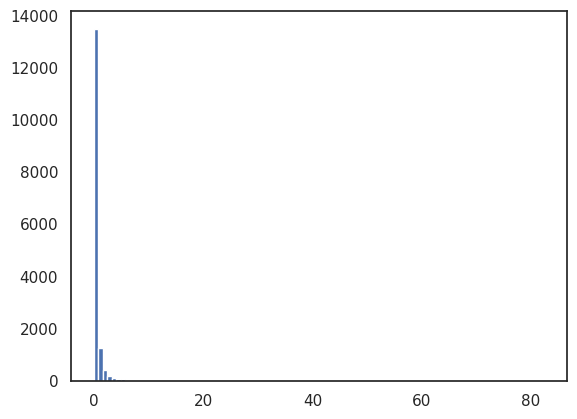

In [ ]:
plt.hist(gamesAndCompanies_df['Global_Sales'], bins=100)
plt.show()

In [ ]:
gamesAndCompanies_df['Platform'] = gamesAndCompanies_df['Platform'].astype(object)


###Unskewing of the global_sales variable
We will only be predicting the global_sales variable so we will just unskew this variable

In [ ]:
gamesAndCompanies_df['Global_Sales'] = np.log1p(gamesAndCompanies_df['Global_Sales'])
print("The skewness of Global_Sales is {}".format(gamesAndCompanies_df['Global_Sales'].skew()))

The skewness of Global_Sales is 2.7926305436199605


In [ ]:
gamesAndCompanies_df['Global_Sales'] = np.log1p(gamesAndCompanies_df['Global_Sales'])
print("The skewness of Global_Sales is {}".format(gamesAndCompanies_df['Global_Sales'].skew()))

The skewness of Global_Sales is 1.724637831149717


In [ ]:
gamesAndCompanies_df['User_Count'] = np.log1p(gamesAndCompanies_df['User_Count'])
print("The skewness of User_Count is {}".format(gamesAndCompanies_df['User_Count'].skew()))

The skewness of User_Count is 1.8358064144943695


In [ ]:
gamesAndCompanies_df['User_Count'] = np.log1p(gamesAndCompanies_df['User_Count'])
print("The skewness of User_Count is {}".format(gamesAndCompanies_df['User_Count'].skew()))

The skewness of User_Count is 0.6930974548036529


In [ ]:
print("The skewness of Global_Sales is {}".format(gamesAndCompanies_df['Global_Sales'].skew()))
print("The skewness of NA_Sales is {}".format(gamesAndCompanies_df['NA_Sales'].skew()))
print("The skewness of EU_Sales is {}".format(gamesAndCompanies_df['EU_Sales'].skew()))
print("The skewness of JP_Sales is {}".format(gamesAndCompanies_df['JP_Sales'].skew()))
print("The skewness of JP_Sales is {}".format(gamesAndCompanies_df['Other_Sales'].skew()))
print("The skewness of Critic_Score is {}".format(gamesAndCompanies_df['Critic_Score'].skew()))
print("The skewness of Critic_Count is {}".format(gamesAndCompanies_df['Critic_Count'].skew()))
print("The skewness of User_Count is {}".format(gamesAndCompanies_df['User_Count'].skew()))
print("The skewness of marketcap is {}".format(gamesAndCompanies_df['marketcap'].skew()))


The skewness of Global_Sales is 1.724637831149717
The skewness of NA_Sales is 18.534842468550195
The skewness of EU_Sales is 18.931192434957147
The skewness of JP_Sales is 13.304519945692013
The skewness of JP_Sales is 24.23546792805335
The skewness of Critic_Score is -1.1426182546207948
The skewness of Critic_Count is 2.0847134457566083
The skewness of User_Count is 0.6930974548036529
The skewness of marketcap is -1.8699914802732076


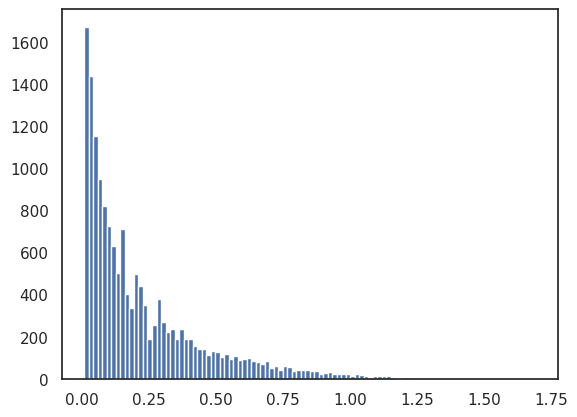

In [ ]:
plt.hist(gamesAndCompanies_df['Global_Sales'], bins=100)
plt.show()

In [ ]:
def mae(y_true, y_pred):
    return np.average(abs(y_true - y_pred))

## Comparison of different machine learning models

In [ ]:
from sklearn.model_selection import train_test_split


basic_target= pd.Series(gamesAndCompanies_df['Global_Sales'])
basic_features= gamesAndCompanies_df[['Critic_Score','marketcap','Critic_Count','User_Count']]

features_train, features_test, target_train, target_test = train_test_split(basic_features, basic_target, 
                                                                            test_size=0.2)
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(12588, 4)
(3148, 4)
(12588,)
(3148,)


In [ ]:
from sklearn.metrics import mean_squared_error

#function for fitting and evaluating different machine learning models
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(features_train, target_train)
    
    # Make predictions and evalute
    model_test_pred = model.predict(features_test)
    model_train_pred = model.predict(features_train)
    model_mae = mae(target_test,model_test_pred)
    model_train_variance = model.score(features_train,target_train)
    model_train_mae =mae(target_train,model_train_pred)
    
    

    model_test_variance = model.score(features_test,target_test)
    model_test_mae=mae(target_test,model_test_pred)
    

    return model_train_variance,model_train_mae,model_test_variance,model_test_mae,model

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier


### Creating a baseline Model
For the baseline model we will be using Linear Regression model

In [ ]:
lr = LinearRegression()
lr_train_variance,lr_train_mae,lr_test_variance,lr_test_mae,lr_model=fit_and_evaluate(lr)

In [ ]:
knn = KNeighborsRegressor(n_neighbors=20)
knn_train_variance,knn_train_mae,knn_test_variance,knn_test_mae,knn_model=fit_and_evaluate(knn)

In [ ]:
ridge = Ridge(alpha=10)
ridge_train_variance,ridge_train_mae,ridge_test_variance,ridge_test_mae,ridge_model=fit_and_evaluate(ridge)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=6.59263e-22): result may not be accurate.



In [ ]:
random_forest = RandomForestRegressor(random_state=60)
rf_train_variance,rf_train_mae,rf_test_variance,rf_test_mae,rf_model=fit_and_evaluate(random_forest)

In [ ]:
gradient_boosting = GradientBoostingRegressor(random_state=60)
gb_train_variance,gb_train_mae,gb_test_variance,gb_test_mae,gb_model=fit_and_evaluate(gradient_boosting)

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18]),
 [Text(0.0, 0, '0.00'),
  Text(0.02, 0, '0.02'),
  Text(0.04, 0, '0.04'),
  Text(0.06, 0, '0.06'),
  Text(0.08, 0, '0.08'),
  Text(0.1, 0, '0.10'),
  Text(0.12, 0, '0.12'),
  Text(0.14, 0, '0.14'),
  Text(0.16, 0, '0.16'),
  Text(0.18, 0, '0.18')])

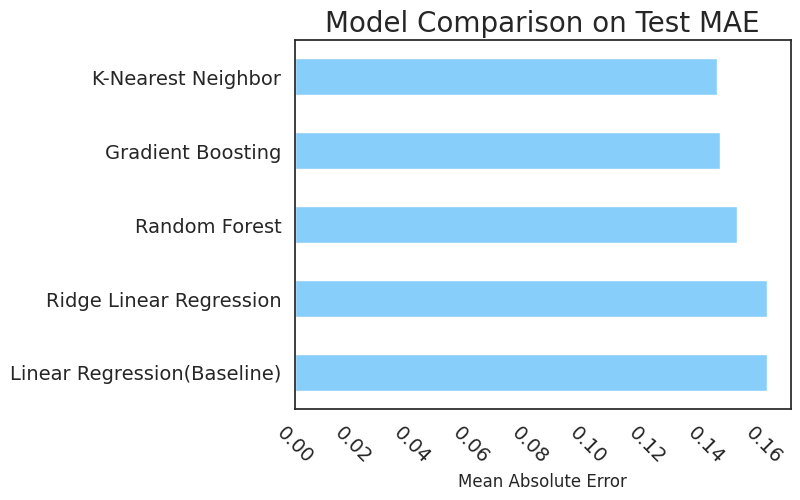

In [ ]:
model_comparison = pd.DataFrame({"model": ["Linear Regression(Baseline)", "K-Nearest Neighbor",
                                           "Random Forest", "Gradient Boosting",
                                            "Ridge Linear Regression"],
                                 "mae_test": [lr_test_mae, knn_test_mae, rf_test_mae, 
                                         gb_test_mae, ridge_test_mae]})
model_comparison.sort_values("mae_test", ascending=False).plot(x="model", y="mae_test", kind="barh",
                                                           color="lightskyblue", legend=False)
plt.ylabel(""); plt.yticks(size=14); plt.xlabel("Mean Absolute Error"); plt.xticks(size=14)
plt.title("Model Comparison on Test MAE", size=20);
plt.xticks(rotation=-45)


(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18]),
 [Text(0.0, 0, '0.00'),
  Text(0.02, 0, '0.02'),
  Text(0.04, 0, '0.04'),
  Text(0.06, 0, '0.06'),
  Text(0.08, 0, '0.08'),
  Text(0.1, 0, '0.10'),
  Text(0.12, 0, '0.12'),
  Text(0.14, 0, '0.14'),
  Text(0.16, 0, '0.16'),
  Text(0.18, 0, '0.18')])

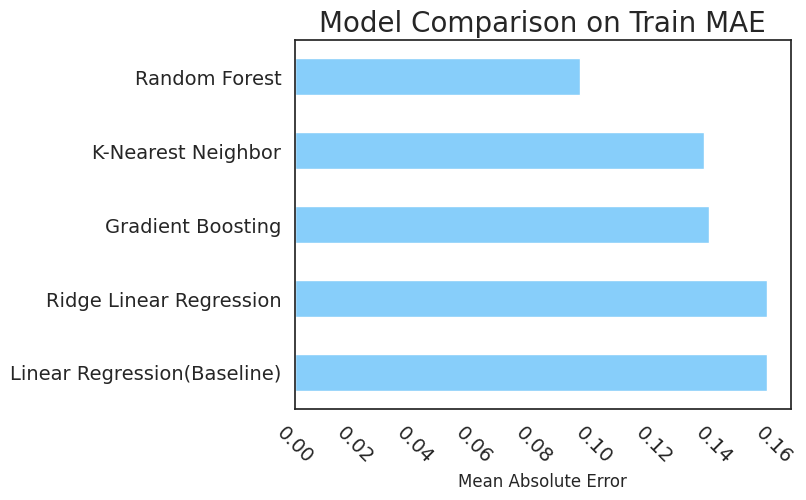

In [ ]:
model_comparison = pd.DataFrame({"model": ["Linear Regression(Baseline)", "K-Nearest Neighbor",
                                           "Random Forest", "Gradient Boosting",
                                            "Ridge Linear Regression"],
                                 "mae_train": [lr_train_mae, knn_train_mae, rf_train_mae, 
                                         gb_train_mae, ridge_train_mae]})
model_comparison.sort_values("mae_train", ascending=False).plot(x="model", y="mae_train", kind="barh",
                                                           color="lightskyblue", legend=False)
plt.ylabel(""); plt.yticks(size=14); plt.xlabel("Mean Absolute Error"); plt.xticks(size=14)
plt.title("Model Comparison on Train MAE", size=20);
plt.xticks(rotation=-45)




### Conclusion 
From all the different graphs, we can see that Gradient Boosting Regression is the best machine learning model in terms of Mean Absolute Error

## Hyperparameter tuning
Now we have gathered that Gradient Boosting regression is the best machine learning model.
First I am going to use randomized search to find the best parameters for max_depth, min_samples_Leaf, min_samples_split and max_features, and then for the hyperparameter "n_estimators" we will be using a method in Gradient Boosting that allows us to iterate over the predictions of each estimator trained, from 1 to 500. So, we will create a loop that goes through the 500 estimators in the gbr model, predicts results using the method staged_predict(), calculates the mean squared error and store the result in the list errors.



In [ ]:
# Loss function to be optimized
loss = ["ls", "lad", "huber"]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ["auto", "sqrt", "log2", None]

hyperparameter_grid = {"loss": loss,
                       "max_depth": max_depth,
                       "min_samples_leaf": min_samples_leaf,
                       "min_samples_split": min_samples_split,
                       "max_features": max_features}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
basic_model = GradientBoostingRegressor(random_state = 42)

random_cv = RandomizedSearchCV(estimator=basic_model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=20, 
                               scoring='neg_mean_absolute_error',
                               n_jobs=-1, verbose=1, 
                               return_train_score=True,
                               random_state=42)

In [ ]:
random_cv.fit(features_train, target_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


48 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/utils/_param_

RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'loss': ['ls', 'lad', 'huber'],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 4, 6, 10]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=1)

Printing out 10 best estimators found by randomized search.

In [ ]:

random_results = pd.DataFrame(random_cv.cv_results_).sort_values("mean_test_neg_mean_absolute_error", ascending=False)
random_results.head(5)[["mean_test_neg_mean_absolute_error", "param_loss",
                         "param_max_depth", "param_min_samples_leaf", "param_min_samples_split",
                         "param_max_features"]]

,mean_test_neg_mean_absolute_error,param_loss,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_max_features
7,-0.138140,huber,5,6,6,auto
9,-0.138965,huber,2,6,10,log2
13,-0.138990,huber,2,4,4,log2
10,-0.138991,huber,2,1,2,sqrt
18,-0.139013,huber,2,8,6,sqrt


In [ ]:
random_cv.best_estimator_


GradientBoostingRegressor(loss='huber', max_depth=15, max_features='log2',
                          min_samples_leaf=8, min_samples_split=6,
                          random_state=42)

## Hyperparameter tuning of n_estimators

We will try to use a range of 0-500 for the n_estimators and a initial learning rate of 0.1 (default is 0.1)

In [ ]:
gbr=random_cv.best_estimator_
gbr.set_params(n_estimators=500, learning_rate=0.1)

GradientBoostingRegressor(loss='huber', max_depth=15, max_features='log2',
                          min_samples_leaf=8, min_samples_split=6,
                          n_estimators=500, random_state=42)

In [ ]:
gbr=gbr.fit(features_train,target_train)

In [ ]:
# Loop for the best number
errors1 = [ mae(target_test, preds) for preds in gbr.staged_predict(features_test)]
# Optimal number of estimators
optimal_num_estimators = np.argmin(errors1) + 1

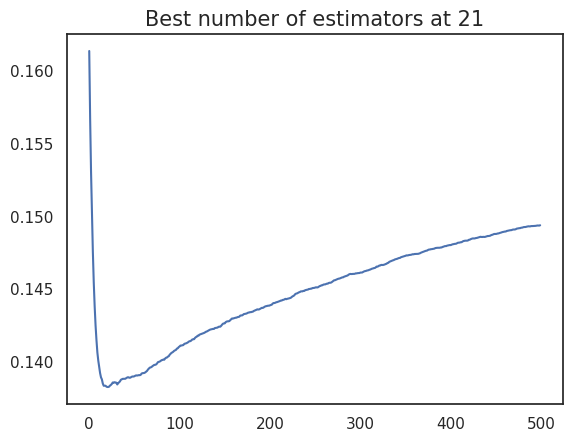

In [ ]:
#Plot
g=sb.lineplot(x=range(500), y=errors1)
g.set_title(f'Best number of estimators at {optimal_num_estimators}', size=15);

In [ ]:
print("The best n_estimator of 21 has a MAE of :\t",errors1[20])

The best n_estimator of 21 has a MAE of :	 0.1382873520775407


Next we can try to reduce the learning rate of the model and as explained earlier, lowering the learning rate of a model ensures that we wont miss the minimum error so this might mean that we will have a lower error

In [ ]:
gbr=random_cv.best_estimator_
gbr.set_params(n_estimators=500, learning_rate=0.01)

GradientBoostingRegressor(learning_rate=0.01, loss='huber', max_depth=15,
                          max_features='log2', min_samples_leaf=8,
                          min_samples_split=6, n_estimators=500,
                          random_state=42)

In [ ]:
gbr=gbr.fit(features_train,target_train)

In [ ]:
# Loop for the best number
errors2 = [ mae(target_test, preds) for preds in gbr.staged_predict(features_test)]
# Optimal number of estimators
optimal_num_estimators = np.argmin(errors2) + 1

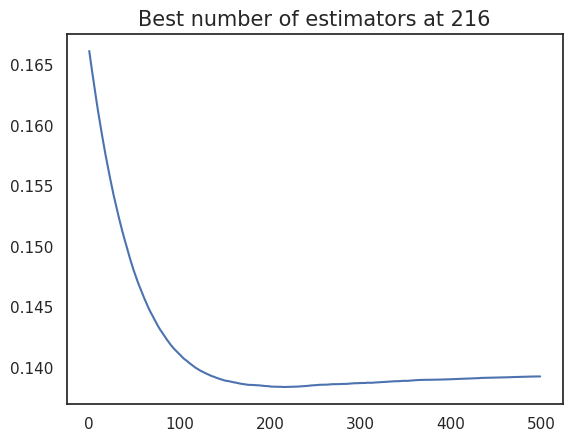

In [ ]:
#Plot
g=sb.lineplot(x=range(500), y=errors2)
g.set_title(f'Best number of estimators at {optimal_num_estimators}', size=15);

In [ ]:
print("The best n_estimator of 216 and learning rate of 0.01 has a MAE of :\t",errors2[215])

The best n_estimator of 216 and learning rate of 0.01 has a MAE of :	 0.13840780984385398


We have gotten a slightly higher MAE than the learning rate of 0.01 and n_estimators of 21.
We will try to lower the learning rate of the estimators to see if there is a noticeable difference

In [ ]:
gbr=random_cv.best_estimator_
gbr.set_params(n_estimators=5000, learning_rate=0.001)

GradientBoostingRegressor(learning_rate=0.001, loss='huber', max_depth=15,
                          max_features='log2', min_samples_leaf=8,
                          min_samples_split=6, n_estimators=5000,
                          random_state=42)

In [ ]:
gbr=gbr.fit(features_train,target_train)

In [ ]:
# Loop for the best number
errors3 = [ mae(target_test, preds) for preds in gbr.staged_predict(features_test)]
# Optimal number of estimators
optimal_num_estimators = np.argmin(errors3) + 1

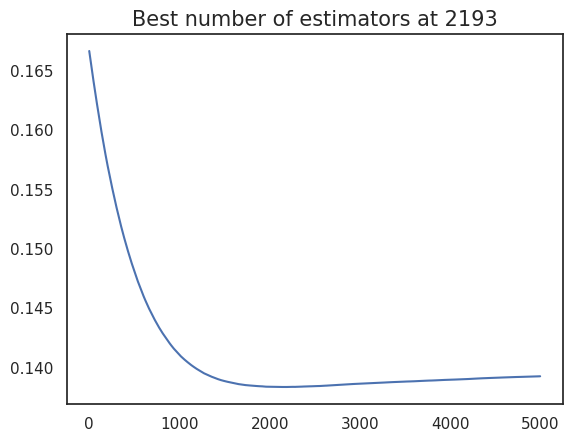

In [ ]:
#Plot
g=sb.lineplot(x=range(5000), y=errors3)
g.set_title(f'Best number of estimators at {optimal_num_estimators}', size=15);

In [ ]:
print("The best n_estimator of 2193 and learning rate of 0.001 has a MAE of :\t",errors3[2192])

The best n_estimator of 2193 and learning rate of 0.001 has a MAE of :	 0.138372016919812


In [ ]:
final_model=GradientBoostingRegressor(learning_rate=0.1, loss='huber', max_depth=15,
                          max_features='log2', min_samples_leaf=8,
                          min_samples_split=6, n_estimators=21,
                          random_state=42)
final_model.fit(features_train,target_train)

GradientBoostingRegressor(loss='huber', max_depth=15, max_features='log2',
                          min_samples_leaf=8, min_samples_split=6,
                          n_estimators=21, random_state=42)

### Conclusion
After tuning the hyperparameters the MAE improved by a very small margin.
Looks like hyperparameter tuning didn't really improve the model. 

Final Model's Mean Absolute Error (Train) (MAE) 	: 0.11756602226870072

Final Model's Mean Absolute Error (Test) (MAE) 	: 0.14299235979700872



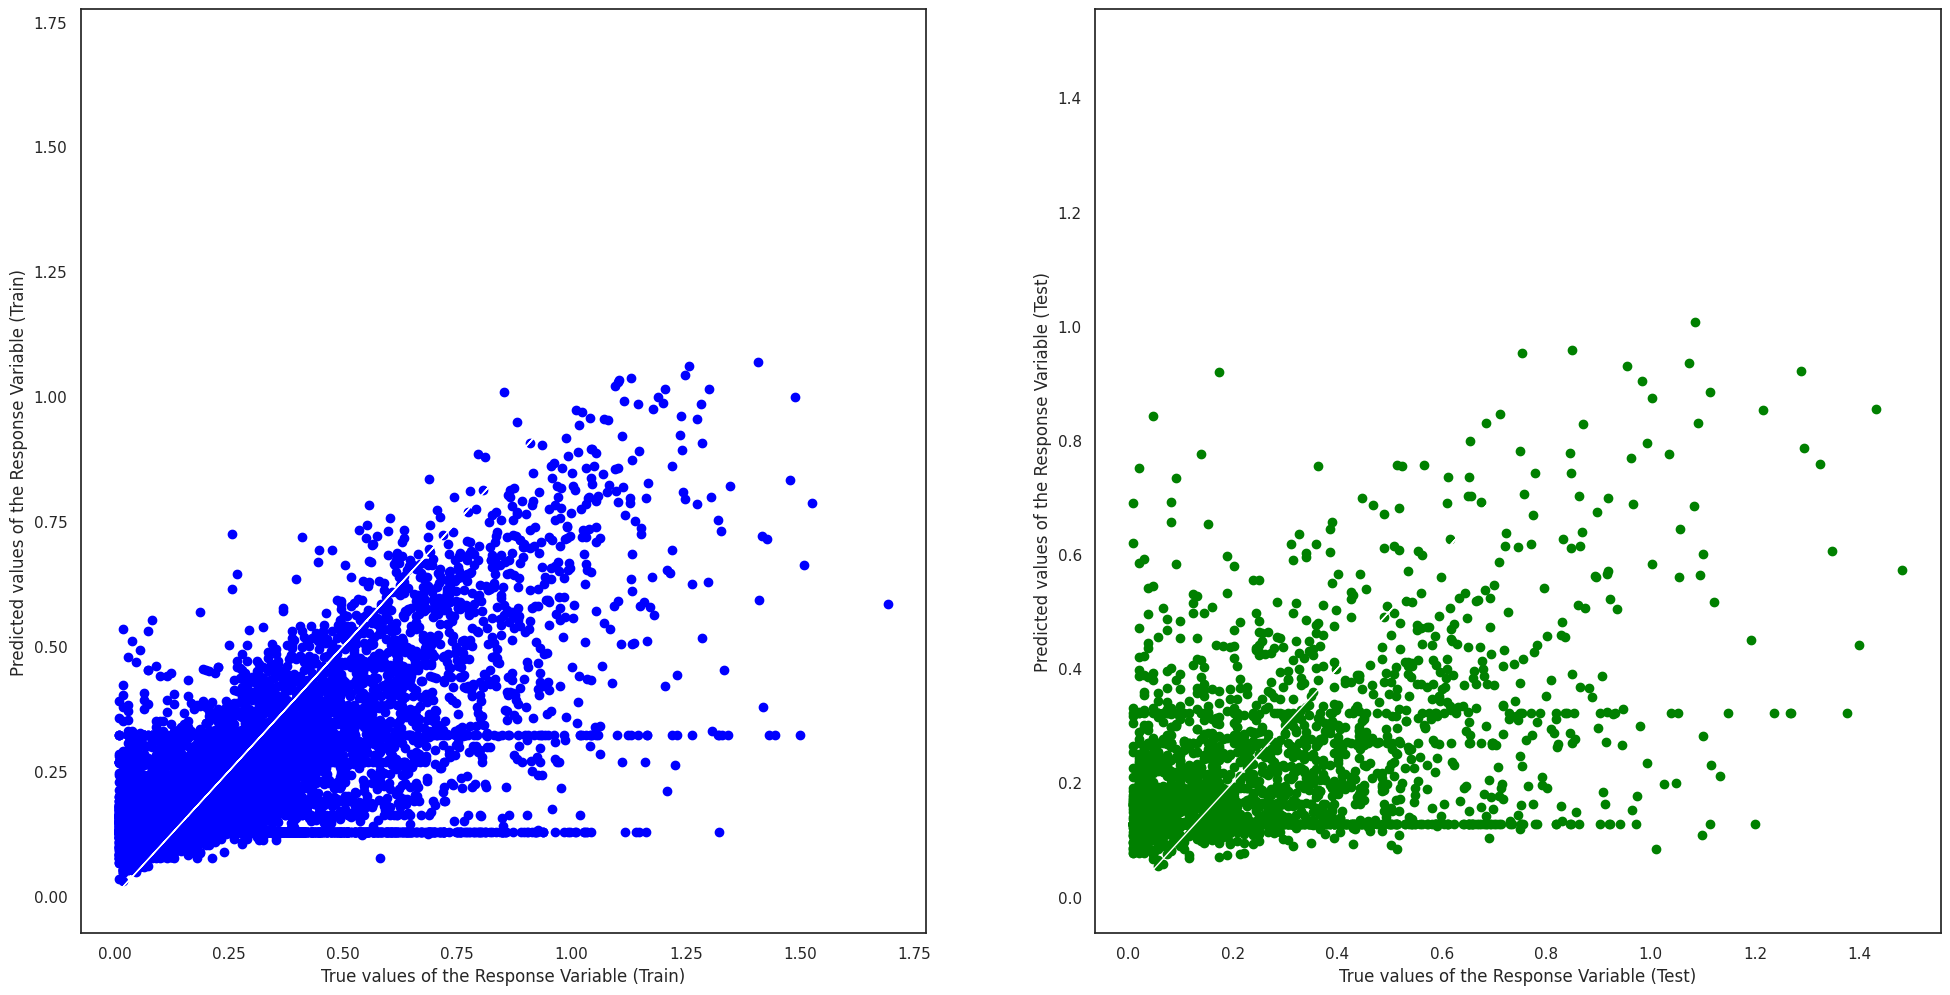

In [ ]:
test_final_pred = final_model.predict(features_test)
train_final_pred = final_model.predict(features_train)
print("Final Model's Mean Absolute Error (Train) (MAE) \t:",mae(target_train,train_final_pred))
print()
print("Final Model's Mean Absolute Error (Test) (MAE) \t:", mae(target_test,test_final_pred))
print()
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(target_train, train_final_pred, color = "blue")
axes[0].plot(target_train, target_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(target_test, test_final_pred, color = "green")
axes[1].plot(target_test, target_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

Initial Model's Mean Absolute Error (Train) (MAE) 	: 0.13816842288806583

Initial Model's Mean Absolute Error (Test) (MAE) 	: 0.1448137813415275



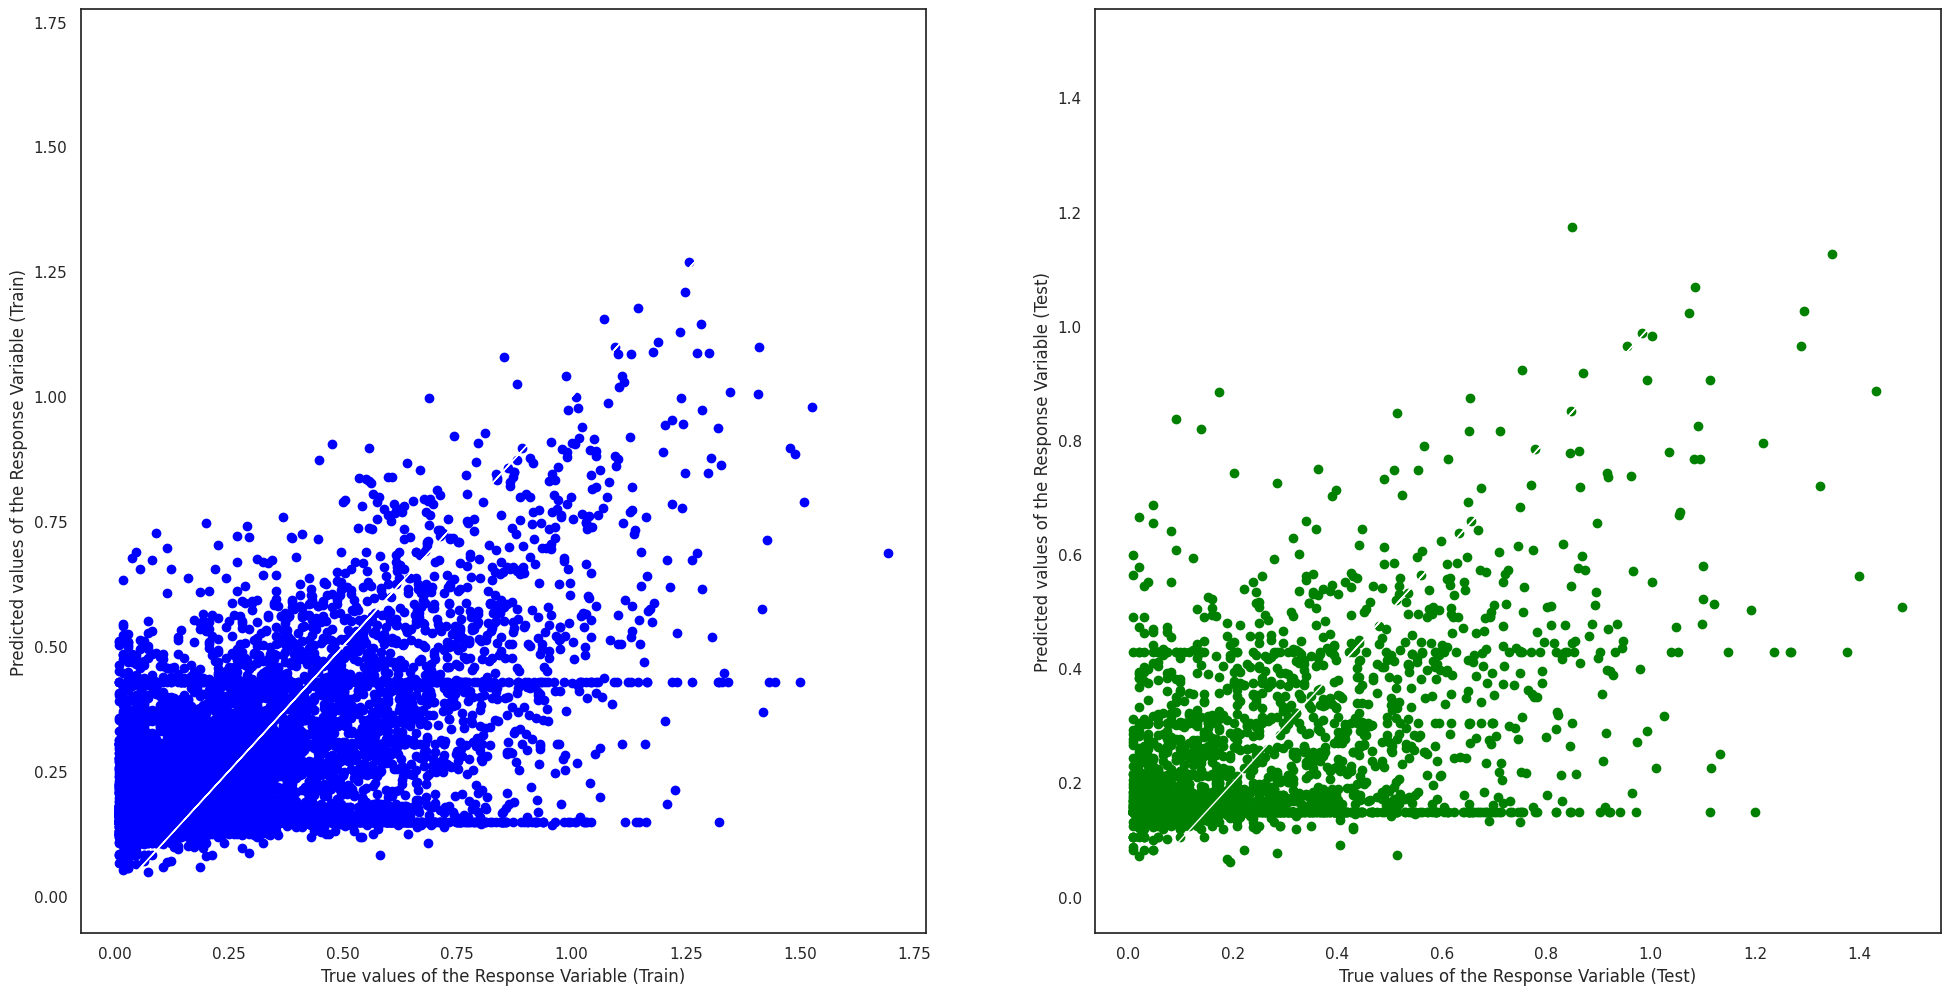

In [ ]:
gb=GradientBoostingRegressor(random_state=60)

gb.fit(features_train, target_train)



# Predict Response corresponding to Predictors
target_train_pred = gb.predict(features_train)
target_test_pred = gb.predict(features_test)


print("Initial Model's Mean Absolute Error (Train) (MAE) \t:",mae(target_train,target_train_pred))
print()
print("Initial Model's Mean Absolute Error (Test) (MAE) \t:",mae(target_test,target_test_pred))
print()


# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(target_train, target_train_pred, color = "blue")
axes[0].plot(target_train, target_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(target_test, target_test_pred, color = "green")
axes[1].plot(target_test, target_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

##

##Checkpoint 3
1.  Explain the reason for choosing your machine learning model.
2.  Detailed & formal introduction to your model. You must provide the formulation or diagram of the model you use thoroughly. Choosing your machine learning model.
3.  Detailed & formal introduction to your model. You must provide the formulation or diagram of the model you use thoroughly. Clarify the input and output of your model.
4.  Clarify how you train and inference based on the model you choose.
5.  Clarify the choice of hyperparameters of your model.

**Answers**

1.  The main reasons as to why we have chosen Gradient Boosting Regression is mainly it did the best in terms of Mean Absolute Error as compared to the other models that we have compared with, another reason is that Gradient Boosting Regression is a complex model that allows for high flexibility in the hyperparameters when given the correct hyperparameters it will outperform most models in terms of accuracy.

2.  As shown above, the diagram of the model when plotted against a linear regression line is shown. 

3.  Gradient Boosting Model is a type of machine learning boosting that build models sequentially and these subsequent models try to reduce the errors of the previous model. The error is reduced by building a new model on the errors or residuals of the previous model.

4.  We trained our model by specifiying the predictors and response variables first, which are the marketcap, Critic_Score, Critic_Count, User_Count for the predictors and the Global_Sales for the response variable. We then split the the dataset into train and test with a 0.2 ratio. We then proceeded to fit and predicted with our model.

5. The hyperparameters that we have chosen are decided in the hyperparameters tuning stage.



## Checkpoint 4.1
**Detailed introduction to the performance metrics you use for experiments**
The performance metrics that we used for our experiments is Mean Absolute Error, the reasons as to why we choose to use this performance metric and not Mean Squared Error as Mean Squared Error

##Checkpoint 4.2
The baseline model that we are using to compare our different models is Linear Regression. We have chosen Linear Regression ,firstly it is because the models that we are comparing with are complex models such as Gradient Boosting Regression hence having a simple linear regression model with a few features is a great baseline model. Having a simple baseline model like Linear Regression helps to save time but provides 90% of the accuracy. 



##Checkpoint 4.3
Detailed model selection and comparison: Is your model fitting well compared to your baselines? Which configuration (hyperparameter choices) performs the best? What numerical results lead to these conclusions? Your conclusion is held in what sense? The analysis of this part (not the performance alone) is the most important.

As shown earlier, we have compared our models in terms of the Mean Absolute Error and we have concluded that Gradient Boosting Regression is the best model in terms of the performance metric. Our model, Gradient Boosting Regression is fitting well compared to our baseline Linear Regression model.

To conclude, It looks like the higher the n_estimator and the lower the learning rate it seems that we will get a slightly worse model in terms of MAE, so hence we will be using an n_estimator of 21 and a learning rate of 0.1 along with the other hyperparameters.

Hence the final hyperparameter that we will be using for Gradient Boosting Regressor is:
1.  Loss='Huber'
2.  max_depth=15
3.  max_features='log2'
4.  min_samples_leaf=8
5.  min_samples_split=6
6.  random_state=42
7.  n_estimator=21
8.  learning_rate=0.1

On top of the performance alone for Gradient Boosting Regression, we have chosen it as it is a complex model that allows for flexibility in hyperparameters due to a wide ranging of hyperparameters to tune for a better accuracy.

What is Gradient Boosting?
Gradient boosting is a technique for repeatedly adding decision trees so that the next decision tree corrects the previous decision tree error.



# Checkpoint 5

**Briefly summarize your findings in Experiments.**
To conclude our findings, we have decided to use regression models to solve our original question of “What determines the success of video games?”. We have compared several regression models in terms of the Mean Absolute Error and we have concluded that Gradient Boosting Regressor is the best performing model. In the comparison we have included the baseline model of Linear Regression Model as Linear Regression is a very common basic model. The tuning of our hyperparameters with randomisedSearchCV and using an iteration loop to find the best n_estimator has yielded a slight improvement of our model which concludes that hyperparameter tuning of our model did not help in improving the accuracy of our model.


---



---



**The limitation of your current model. How you can improve your model.**
Some limitations of Gradient Boosting Regressor is that the high flexibility results in many parameters that interact and heavily influence the behavior of the approach (number of iterations, tree depth, regularization parameters, etc.). This requires a large grid search during tuning. We have used randomisedSearchCV and gridSearchCV for the hyperparameter tuning and for gridSearchCV, the ones with 90+ fits took approximately 30 mins to 1 hour. In the future, We can use HalvingGridSearchCV instead as it yields the optimal hyperparameters in a shorter time while retaining accuracy
